### Testing the original model with some holonomic movement

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
    
import numpy as np
import matplotlib.pyplot as plt

import central_complex
import cx_rate
import trials
import analysis
import plotter

In [52]:
# plt.style.use('dark_background')
plt.style.use('seaborn')


In [53]:
# np.random.seed(42)

In [3]:
save_figs=False

In [4]:
myseed=42

## No outbound route - local search around nest

In [59]:
T_outbound=1 # fails with 0, so set to 1.
T_inbound=5000

In [60]:
noise=0.1
cx = cx_rate.CXRatePontin(noise=noise, random_seed=myseed)


In [61]:
h, v, log, cpu4_snapshot = trials.run_trial(logging=True,
                                            T_outbound=T_outbound,
                                            T_inbound=T_inbound,
                                            noise=noise,
                                            cx=cx)


Text(0.5,1,'No outbound route')

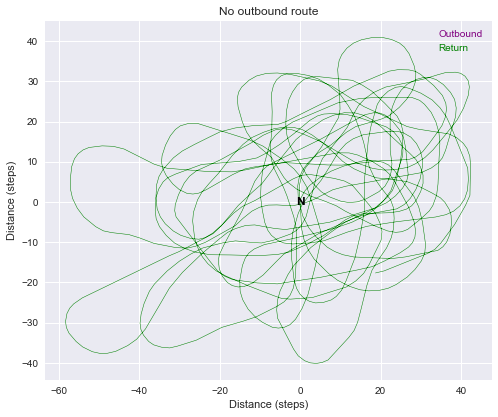

In [63]:
fig, ax = plotter.plot_route(h, v, T_outbound=T_outbound, T_inbound=T_inbound,
                   plot_speed=False, plot_heading=True, quiver_color='black', figsize=(8,8))
#                             outbound_color='white', inbound_color='yellow')
ax.set_title('No outbound route')

/Users/anti/anaconda3/envs/stoneenv/lib/python2.7/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


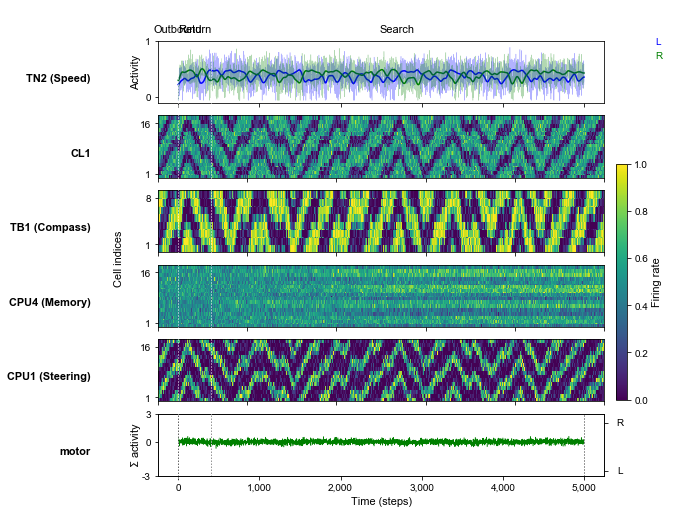

In [9]:
fig, ax = plotter.plot_traces(
        log, include=['TN2', 'CL1', 'TB1', 'CPU4', 'CPU1', 'motor'], figsize=(8,8))
        #trimmed_log, include=['TN1', 'TN2', 'CL1', 'TB1', 'CPU4', 'CPU1', 'motor'], t_start=start)
if save_figs:
    plotter.save_plot(fig, 'example_traces')

In [10]:
### Now try to turn off memory...

In [64]:
noise=0.1
cx_noread = cx_rate.CXRatePontin(noise=noise, random_seed=myseed)

In [65]:
cpu4_cpu1a = cx_noread.W_CPU4_CPU1a.copy()

In [66]:
cpu4_cpu1a

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [67]:
cx_noread.W_CPU4_CPU1a = np.zeros_like(cpu4_cpu1a)

In [68]:
cpu4_cpu1b = cx_noread.W_CPU4_CPU1b.copy()
cx_noread.W_CPU4_CPU1b = np.zeros_like(cpu4_cpu1b)

In [69]:
cpu4_pontin = cx_noread.W_CPU4_pontin.copy()
cx_noread.W_CPU4_pontin = np.zeros_like(cpu4_pontin)

In [70]:
T_outbound_cx = 1500

In [71]:
h, v, log, cpu4_snapshot = trials.run_trial(logging=True,
                                            T_outbound=1,
                                            T_inbound=T_outbound_cx,
                                            noise=noise,
                                            cx=cx_noread)


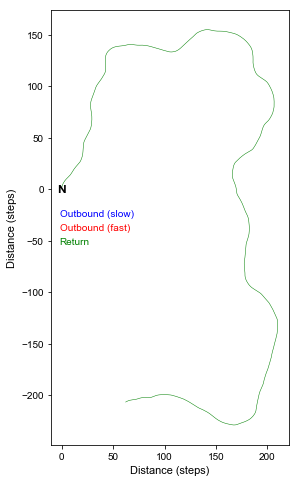

In [19]:
fig, ax = plotter.plot_route(h, v, T_outbound=1, T_inbound=T_outbound_cx,
                   plot_speed=True, plot_heading=True, quiver_color='black', figsize=(8,8))

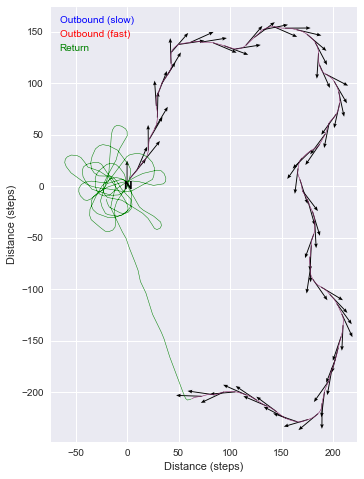

In [72]:
T_inbound = 3000
noise = 0.1
    
cx = cx_rate.CXRatePontin(noise=noise)

# now use generated route as outbound route with a normal cx
h, v, log, cpu4_snapshot = trials.run_trial(logging=True,
                                            T_outbound=T_outbound_cx,
                                            T_inbound=T_inbound,
                                            noise=noise,
                                            cx=cx,
                                            route=(h[:T_outbound_cx], v[:T_outbound_cx]))

fig, ax = plotter.plot_route(h, v, T_outbound=T_outbound_cx, T_inbound=T_inbound,
                   plot_speed=True, plot_heading=True, quiver_color='black', figsize=(8,8))

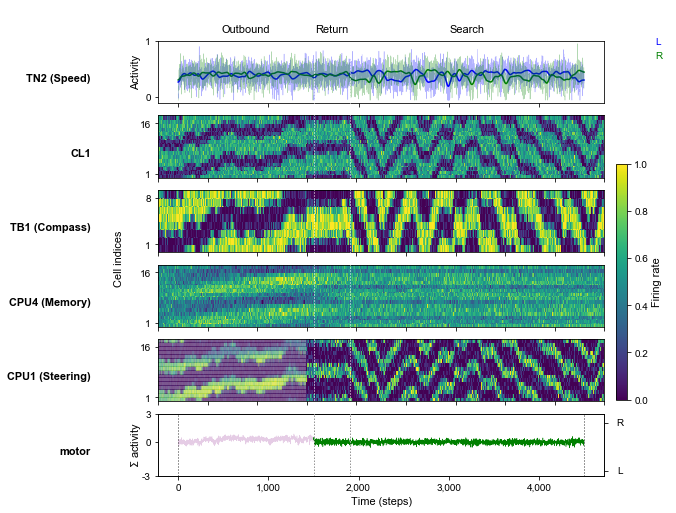

In [21]:
fig, ax = plotter.plot_traces(
        log, include=['TN2', 'CL1', 'TB1', 'CPU4', 'CPU1', 'motor'], figsize=(8,8))
        #trimmed_log, include=['TN1', 'TN2', 'CL1', 'TB1', 'CPU4', 'CPU1', 'motor'], t_start=start)
if save_figs:
    plotter.save_plot(fig, 'example_traces')

### Generate out-/inbound routes with different noise values

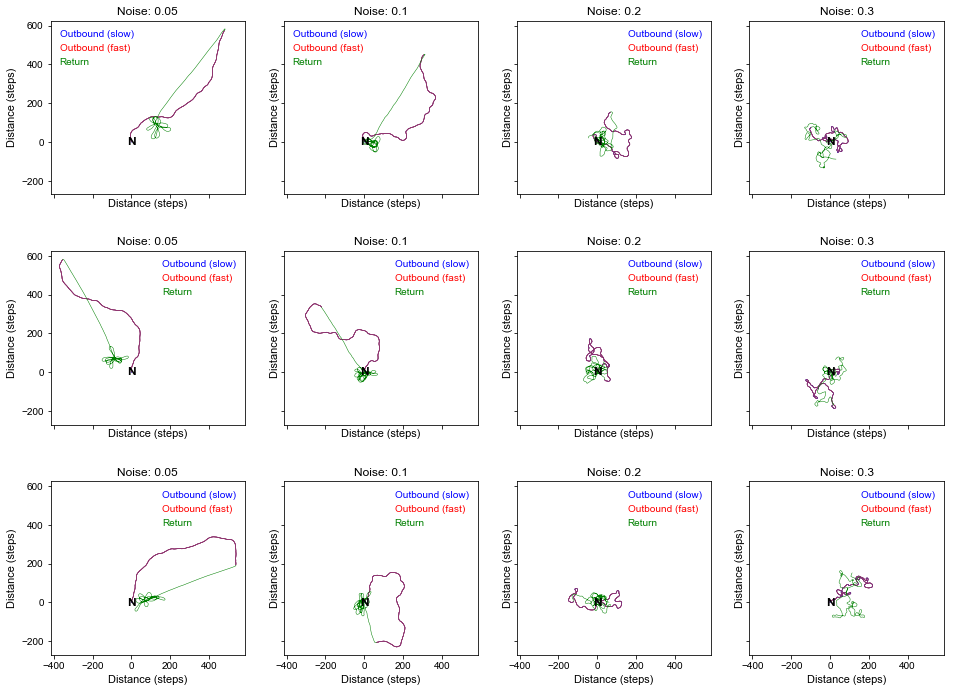

In [22]:
T_outbound_cx = 1500
noises = [0.05, 0.1, 0.2, 0.3]
n_noises = len(noises)
plt_h = 4
seeds = [1, 111, 42]
n_seeds = len(seeds)
f, axs = plt.subplots(n_seeds, n_noises, figsize=(n_noises*plt_h, plt_h*n_seeds), sharex=True, sharey=True)

# f, axs = plt.subplots(1, n_noises, figsize=(n_noises*plt_h, plt_h), sharex=True, sharey=True)

for irow, seed in enumerate(seeds):
    for icol,  noise in enumerate(noises):
        cur_ax = axs[irow, icol]
        cx_cur = cx_rate.CXRatePontin(noise=noise, random_seed=seed)
        cx_cur.W_CPU4_pontin = np.zeros_like(cx_cur.W_CPU4_pontin)
        cx_cur.W_CPU4_CPU1b = np.zeros_like(cx_cur.W_CPU4_CPU1b)
        cx_cur.W_CPU4_CPU1a = np.zeros_like(cx_cur.W_CPU4_CPU1a)

        h, v, log, cpu4_snapshot = trials.run_trial(logging=True,
                                                    T_outbound=1,
                                                    T_inbound=T_outbound_cx,                                                
                                                    cx=cx_cur)

        cx_in = cx_rate.CXRatePontin(noise=noise, random_seed=seed)
        h, v, log, cpu4_snapshot = trials.run_trial(logging=True,
                                                    T_outbound=T_outbound_cx,
                                                    T_inbound=T_inbound,                                                
                                                    cx=cx_in,
                                                    route=(h[:T_outbound_cx], v[:T_outbound_cx]))    
        plotter.plot_route(h, v, T_outbound=T_outbound_cx, T_inbound=T_inbound,
                           plot_speed=True, plot_heading=False, quiver_color='black', figsize=(8,8), ax=cur_ax)
        cur_ax.set_title("Noise: {}".format(noise))


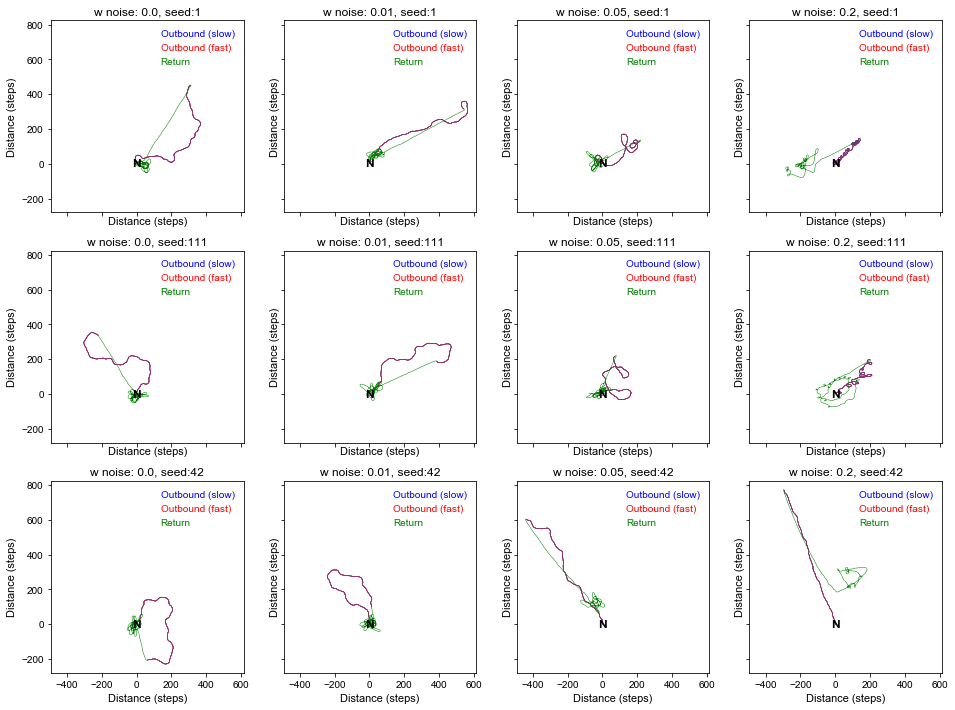

In [23]:
T_outbound_cx = 1500
w_noises = [0.0, 0.01, 0.05, 0.2]
n_noises = len(w_noises)
noise=0.1
plt_h = 4
seeds = [1, 111, 42]
n_seeds = len(seeds)
f, axs = plt.subplots(n_seeds, n_noises, figsize=(n_noises*plt_h, plt_h*n_seeds), sharex=True, sharey=True)

# f, axs = plt.subplots(1, n_noises, figsize=(n_noises*plt_h, plt_h), sharex=True, sharey=True)

for irow, seed in enumerate(seeds):
    for icol,  w_noise in enumerate(w_noises):
        cur_ax = axs[irow, icol]
        cx_cur = cx_rate.CXRatePontin(noise=noise, random_seed=seed, weight_noise = w_noise)
        cx_cur.W_CPU4_pontin = np.zeros_like(cx_cur.W_CPU4_pontin)
        cx_cur.W_CPU4_CPU1b = np.zeros_like(cx_cur.W_CPU4_CPU1b)
        cx_cur.W_CPU4_CPU1a = np.zeros_like(cx_cur.W_CPU4_CPU1a)

        h, v, log, cpu4_snapshot = trials.run_trial(logging=True,
                                                    T_outbound=1,
                                                    T_inbound=T_outbound_cx,                                                
                                                    cx=cx_cur)

        cx_in = cx_rate.CXRatePontin(noise=noise, random_seed=seed, weight_noise = w_noise)
        h, v, log, cpu4_snapshot = trials.run_trial(logging=True,
                                                    T_outbound=T_outbound_cx,
                                                    T_inbound=T_inbound,                                                
                                                    cx=cx_in,
                                                    route=(h[:T_outbound_cx], v[:T_outbound_cx]))    
        plotter.plot_route(h, v, T_outbound=T_outbound_cx, T_inbound=T_inbound,
                           plot_speed=True, plot_heading=False, quiver_color='black', figsize=(8,8), ax=cur_ax)
        cur_ax.set_title("w noise: {}, seed:{}".format(w_noise, seed))


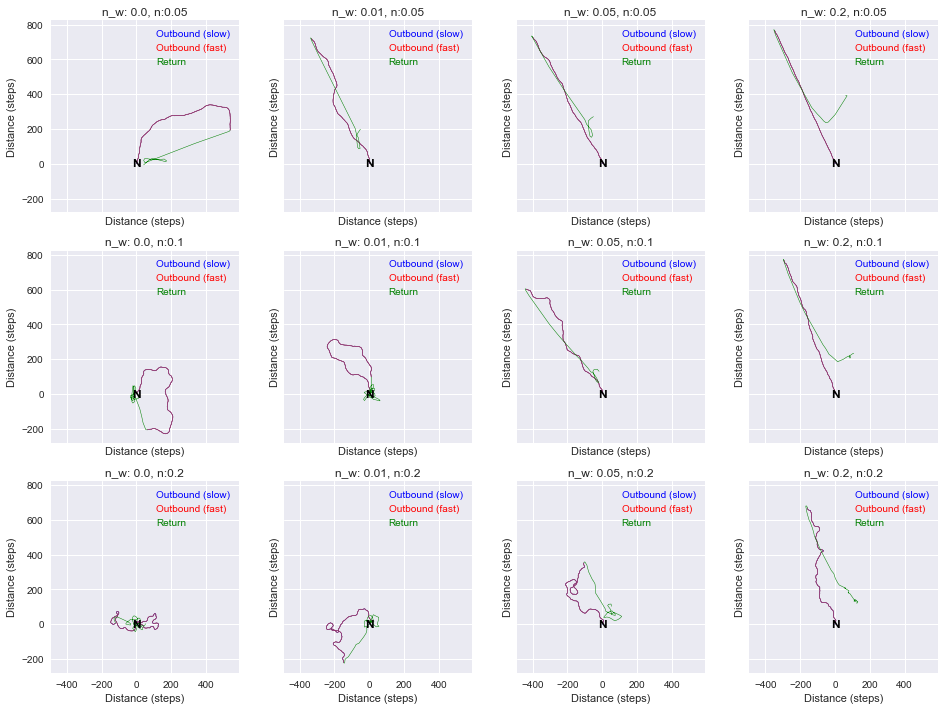

In [73]:
seed = 42

T_outbound_cx = 1500
T_inbound = 1500

noise = 0.1

w_noises = [0.0, 0.01, 0.05, 0.2]
noises = [0.05, 0.1, 0.2]

nw = len(w_noises)
nn = len(noises)

f, axs = plt.subplots(nn, nw, figsize=(nw*plt_h, plt_h*nn), sharex=True, sharey=True)

for irow, noise in enumerate(noises):    
    for icol, w_noise in enumerate(w_noises):
        cur_ax = axs[irow, icol]
        cx_cur = cx_rate.CXRatePontin(noise=noise, random_seed=seed, weight_noise = w_noise)
        cx_cur.W_CPU4_pontin = np.zeros_like(cx_cur.W_CPU4_pontin)
        cx_cur.W_CPU4_CPU1b = np.zeros_like(cx_cur.W_CPU4_CPU1b)
        cx_cur.W_CPU4_CPU1a = np.zeros_like(cx_cur.W_CPU4_CPU1a)

        h, v, log, cpu4_snapshot = trials.run_trial(logging=True,
                                                    T_outbound=1,
                                                    T_inbound=T_outbound_cx,                                                                                        
                                                    cx=cx_cur)

        cx_in = cx_rate.CXRatePontin(noise=noise, random_seed=seed, weight_noise=w_noise)
        h, v, log, cpu4_snapshot = trials.run_trial(logging=True,
                                                    T_outbound=T_outbound_cx,
                                                    T_inbound=T_inbound,                                                
                                                    cx=cx_in,
                                                    route=(h[:T_outbound_cx], v[:T_outbound_cx]))    
        plotter.plot_route(h, v, T_outbound=T_outbound_cx, T_inbound=T_inbound,
                           plot_speed=True, plot_heading=False, quiver_color='black', figsize=(8,8), ax=cur_ax)        
        
#         plotter.plot_route(h, v, T_outbound=1, T_inbound=T_outbound_cx,
#                            plot_speed=True, plot_heading=True, quiver_color='black', figsize=(8,8), ax=cur_ax)
        cur_ax.set_title("n_w: {}, n:{}".format(w_noise, noise))

In [74]:
plt.savefig('plots/trajs_noise_levels.png')

<Figure size 576x396 with 0 Axes>

### checking reproducibility by setting seed...

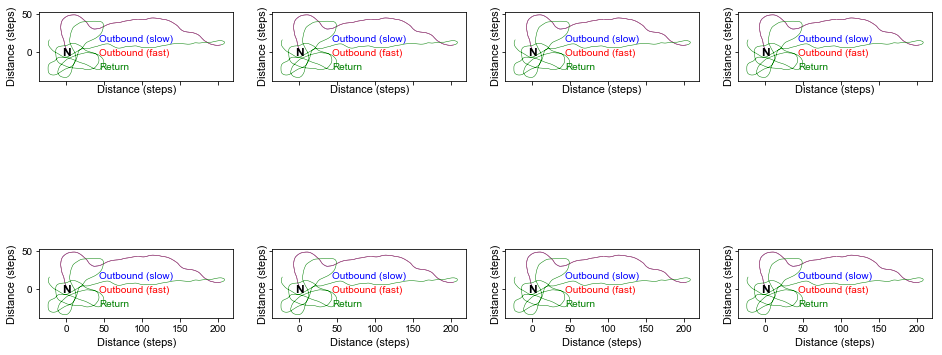

In [25]:
T_outbound_cx = 500
seed = 1
noise = 0.1
w_noise = 0.0

n_iterations = 8
f, axs = plt.subplots(2, 4, figsize=(4*plt_h, plt_h*2), sharex=True, sharey=True)

# f, axs = plt.subplots(1, n_noises, figsize=(n_noises*plt_h, plt_h), sharex=True, sharey=True)
axss  = axs.ravel()

for i in range(n_iterations):
    cur_ax = axss[i]
    cx_cur = cx_rate.CXRatePontin(noise=noise, random_seed=seed, weight_noise=w_noise)
    cx_cur.W_CPU4_pontin = np.zeros_like(cx_cur.W_CPU4_pontin)
    cx_cur.W_CPU4_CPU1b = np.zeros_like(cx_cur.W_CPU4_CPU1b)
    cx_cur.W_CPU4_CPU1a = np.zeros_like(cx_cur.W_CPU4_CPU1a)

    h, v, log, cpu4_snapshot = trials.run_trial(logging=True,
                                                T_outbound=1,
                                                T_inbound=T_outbound_cx,                                                
                                                cx=cx_cur)

    cx_in = cx_rate.CXRatePontin(noise=noise, random_seed=seed, weight_noise=w_noise)
    h, v, log, cpu4_snapshot = trials.run_trial(logging=True,
                                                T_outbound=T_outbound_cx,
                                                T_inbound=T_inbound,                                                
                                                cx=cx_in,
                                                route=(h[:T_outbound_cx], v[:T_outbound_cx]))    
    plotter.plot_route(h, v, T_outbound=T_outbound_cx, T_inbound=T_inbound,
                       plot_speed=True, plot_heading=False, quiver_color='black', figsize=(8,8), ax=cur_ax)    

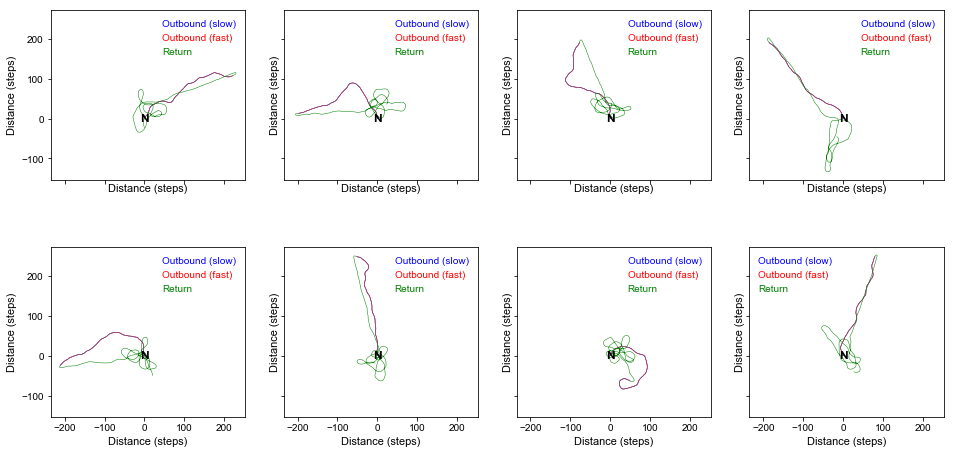

In [26]:
T_outbound_cx = 500
seed = 0
noise = 0.1
w_noise = 0.05

n_iterations = 8
f, axs = plt.subplots(2, 4, figsize=(4*plt_h, plt_h*2), sharex=True, sharey=True)

# f, axs = plt.subplots(1, n_noises, figsize=(n_noises*plt_h, plt_h), sharex=True, sharey=True)
axss  = axs.ravel()

for i in range(n_iterations):
    cur_ax = axss[i]
    cx_cur = cx_rate.CXRatePontin(noise=noise, random_seed=seed, weight_noise=w_noise)
    cx_cur.W_CPU4_pontin = np.zeros_like(cx_cur.W_CPU4_pontin)
    cx_cur.W_CPU4_CPU1b = np.zeros_like(cx_cur.W_CPU4_CPU1b)
    cx_cur.W_CPU4_CPU1a = np.zeros_like(cx_cur.W_CPU4_CPU1a)

    h, v, log, cpu4_snapshot = trials.run_trial(logging=True,
                                                T_outbound=1,
                                                T_inbound=T_outbound_cx,                                                
                                                cx=cx_cur)

    cx_in = cx_rate.CXRatePontin(noise=noise, random_seed=seed, weight_noise=w_noise)
    h, v, log, cpu4_snapshot = trials.run_trial(logging=True,
                                                T_outbound=T_outbound_cx,
                                                T_inbound=T_inbound,                                                
                                                cx=cx_in,
                                                route=(h[:T_outbound_cx], v[:T_outbound_cx]))    
    plotter.plot_route(h, v, T_outbound=T_outbound_cx, T_inbound=T_inbound,
                       plot_speed=True, plot_heading=False, quiver_color='black', figsize=(8,8), ax=cur_ax)    

## My class with on-off CPU4 

homing
homing
homing
homing
homing
homing
homing
homing
homing
homing
homing
homing
homing
homing
homing
homing


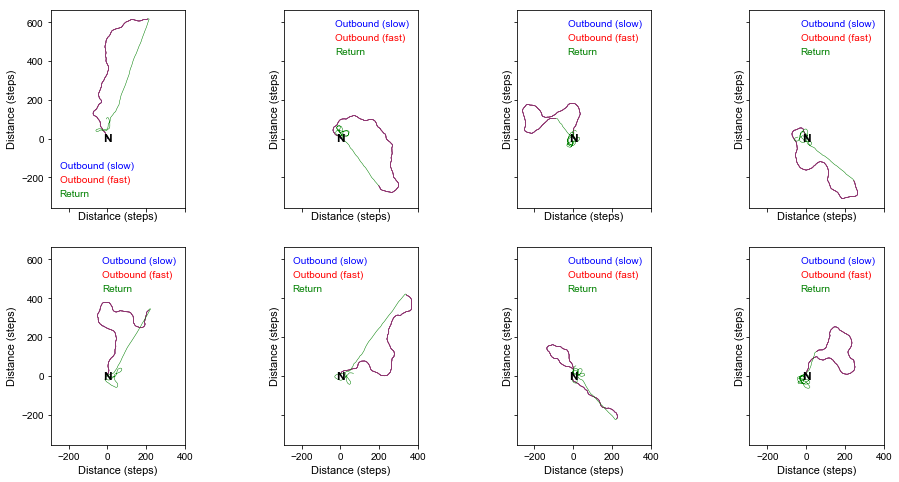

In [28]:
T_outbound = 1500
T_inbound = 1500
seed = 1
noise = 0.1
w_noise = 0.0

n_iterations = 8
f, axs = plt.subplots(2, 4, figsize=(4*plt_h, plt_h*2), sharex=True, sharey=True)
axss  = axs.ravel()

for i in range(n_iterations):
    cur_ax = axss[i]
#     f, cur_ax = plt.subplots()
    cx = cx_rate.CXRatePontinSwitch(noise=noise,  weight_noise=w_noise)#, random_seed=seed)
    results = trials.run_trial_switch(T_outbound=T_outbound, T_inbound=T_inbound, 
                                      noise=noise, weight_noise=w_noise, cx=cx, walk_func=trials.homing)

    plotter.plot_route(results['h'], results['v'], T_outbound=T_outbound, T_inbound=T_inbound,
                       plot_speed=True, plot_heading=False, quiver_color='black', figsize=(8,8), ax=cur_ax)     

walking
pos
[[ 0.00000000e+00  0.00000000e+00]
 [ 8.51013835e-02  1.69999940e-01]
 [ 1.63961576e-01  3.99249149e-01]
 ...
 [-1.63301996e+02  8.42293741e+00]
 [-1.63772558e+02  8.11755388e+00]
 [-1.64255106e+02  7.83779820e+00]]
h
[ 0.00000000e+00  1.19274700e-03  7.68286970e-02  1.96298080e-02
 -1.68925970e-01 -1.57957868e-01 -1.90680567e-01 -3.05619173e-01
 -3.06121664e-01 -2.07579153e-01 -7.18148049e-02 -8.30281897e-02
  3.98206916e-04  1.25129945e-03 -1.13675726e-01  2.17000874e-02
 -1.00205359e-01  3.88070210e-02  5.07480265e-02  1.04057550e-01
  1.35775182e-01  9.78039945e-02 -1.98074318e-04  8.32120725e-02
  2.89535857e-01  2.61725007e-01  3.12842998e-01  3.89984495e-01
  5.20778529e-01  4.92189696e-01  6.19237046e-01  5.71497853e-01
  5.83738126e-01  5.18498835e-01  5.75788217e-01  5.96536952e-01
  5.02921211e-01  4.53964186e-01  3.20158056e-01  2.76795464e-01
  4.00700680e-01  3.47065573e-01  2.59652765e-01  1.27126703e-01
  8.77559941e-02  1.32878695e-01  1.05827614e-01  1.579

walking
walking
pos
[[0.00000000e+00 0.00000000e+00]
 [9.55783041e-02 1.69339193e-01]
 [1.95953316e-01 3.96096049e-01]
 ...
 [9.73785062e+01 2.35544298e+02]
 [9.75147578e+01 2.36088873e+02]
 [9.76434701e+01 2.36635778e+02]]
h
[ 0.          0.12477414  0.22704511  0.31866694  0.34872578  0.26185078
  0.19236979  0.13383503  0.02061172 -0.04115952 -0.17167264 -0.02303201
 -0.09750253 -0.06676958 -0.06811967 -0.09967189 -0.04697522 -0.02794718
 -0.24922771 -0.45569848 -0.58732046 -0.51450893 -0.44026156 -0.47588375
 -0.42957956 -0.42747675 -0.35872956 -0.40613724 -0.37614408 -0.50987923
 -0.52575057 -0.40949272 -0.455488   -0.44221406 -0.50064199 -0.4646826
 -0.52899682 -0.63608901 -0.69547783 -0.56120173 -0.4955186  -0.39672229
 -0.21735153 -0.16333682 -0.26696228 -0.18481093 -0.16435943 -0.05888748
  0.00974043 -0.04394886 -0.19369934 -0.1673901  -0.12328987 -0.09012213
  0.03132726 -0.04202025  0.05202242  0.17502307  0.21578743  0.38246037
  0.50003049  0.43491592  0.37401243  0.44216

walking


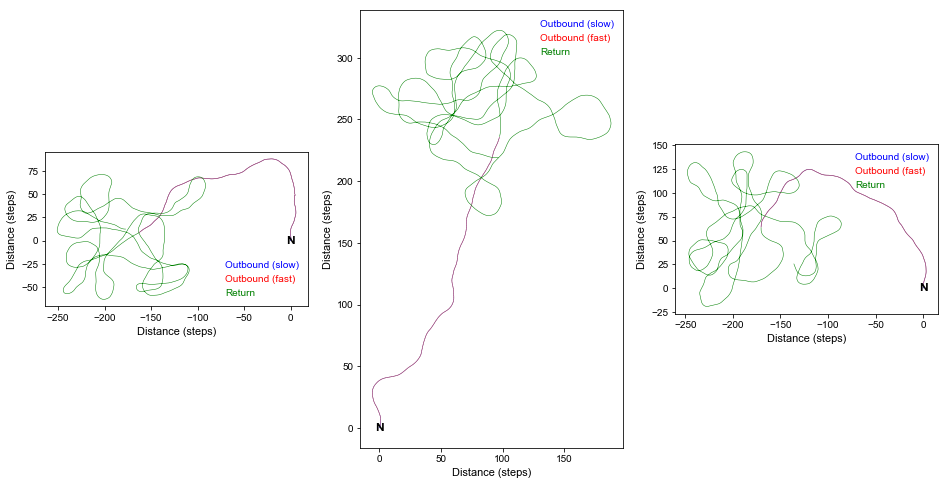

In [32]:
T_outbound = 500
T_inbound = 3000
seed = 1
noise = 0.1
w_noise = 0.01
mem_loss_k=0.3
n_iterations = 3
f, axs = plt.subplots(1, 3, figsize=(16, 12))#, sharex=True, sharey=True)
axss  = axs.ravel()

for i in range(n_iterations):
    cur_ax = axss[i]
#     f, cur_ax = plt.subplots()
    cx = cx_rate.CXRatePontinSwitch(noise=noise,  weight_noise=w_noise, mem_loss_k=mem_loss_k)#, random_seed=seed)
    results = trials.run_trial_switch(T_outbound=T_outbound, T_inbound=T_inbound, 
                                                       noise=noise, weight_noise=w_noise, cx=cx,
                                                      mode='FlyFood', walk_func=trials.walking)
#     h, v, log, cpu4_snapshot
    plotter.plot_route(results['h'], results['v'], T_outbound=T_outbound, T_inbound=T_inbound,
                       plot_speed=True, plot_heading=False, quiver_color='black', figsize=(8,8), ax=cur_ax)     

On the way to keeping track of position 

walking
walking
walking
walking
(283, 2)


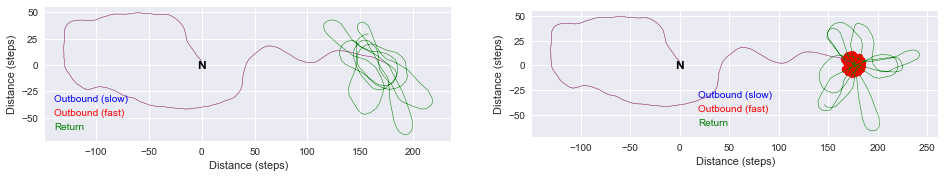

In [57]:
T_outbound = 1000
T_inbound = 2000
seed = 1
noise = 0.1
w_noise = 0.0
mem_loss_k=0.125

f, axs = plt.subplots(1, 2, figsize=(16, 12))#, sharex=True, sharey=True)
axss  = axs.ravel()

if True:
#     for i in range(n_iterations):
    cur_ax = axss[0]
#     f, cur_ax = plt.subplots()
    cx = cx_rate.CXRatePontinSwitch(noise=noise,  weight_noise=w_noise, mem_loss_k=mem_loss_k, random_seed=seed)
    results = trials.run_trial_switch(T_outbound=T_outbound, T_inbound=T_inbound, 
                                                       noise=noise, weight_noise=w_noise, cx=cx,
                                                      mode='FlyFood', walk_func=trials.walking, reward_radius=0)

    cx = cx_rate.CXRatePontinSwitch(noise=noise,  weight_noise=w_noise, mem_loss_k=mem_loss_k, random_seed=seed)
    results_rew = trials.run_trial_switch(T_outbound=T_outbound, T_inbound=T_inbound, 
                                          noise=noise, weight_noise=w_noise, cx=cx,
                                          mode='FlyFood', walk_func=trials.walking, reward_radius=10)
    
    plotter.plot_route(results['h'], results['v'], T_outbound=T_outbound, T_inbound=T_inbound,
                       plot_speed=True, plot_heading=False, quiver_color='black', figsize=(8,8), ax=axs[0])     


    plotter.plot_route(results_rew['h'], results_rew['v'], T_outbound=T_outbound, T_inbound=T_inbound,
                       plot_speed=True, plot_heading=False, quiver_color='black', figsize=(8,8), ax=axs[1])     
    
    inrew = np.array(results_rew['in_reward'])
    print(inrew.shape)
    if inrew.shape[0]>0:
        axs[1].scatter(inrew[:,0], inrew[:,1], color='red')
        

walking
walking
walking
walking
(103, 2)


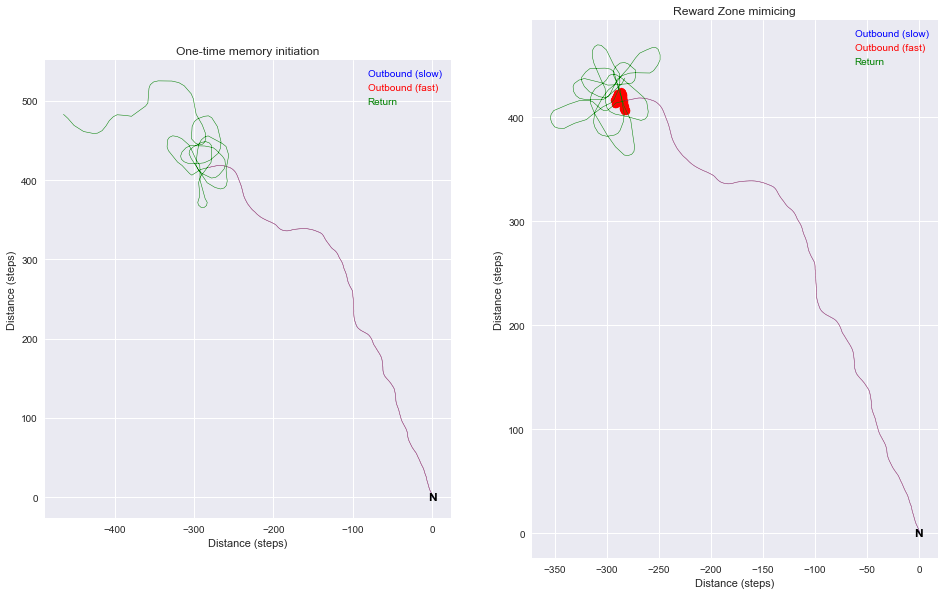

In [58]:
T_outbound = 1000
T_inbound = 2000
seed = 42
noise = 0.1
w_noise = 0.05
mem_loss_k=0.25

f, axs = plt.subplots(1, 2, figsize=(16, 12))#, sharex=True, sharey=True)
axss  = axs.ravel()

if True:
#     for i in range(n_iterations):
    cur_ax = axss[0]
#     f, cur_ax = plt.subplots()
    cx = cx_rate.CXRatePontinSwitch(noise=noise,  weight_noise=w_noise, mem_loss_k=mem_loss_k, random_seed=seed)
    results = trials.run_trial_switch(T_outbound=T_outbound, T_inbound=T_inbound, 
                                                       noise=noise, weight_noise=w_noise, cx=cx,
                                                      mode='FlyFood', walk_func=trials.walking, reward_radius=0)

    cx = cx_rate.CXRatePontinSwitch(noise=noise,  weight_noise=w_noise, mem_loss_k=mem_loss_k, random_seed=seed)
    results_rew = trials.run_trial_switch(T_outbound=T_outbound, T_inbound=T_inbound, 
                                          noise=noise, weight_noise=w_noise, cx=cx,
                                          mode='FlyFood', walk_func=trials.walking, reward_radius=10)
    
    plotter.plot_route(results['h'], results['v'], T_outbound=T_outbound, T_inbound=T_inbound,
                       plot_speed=True, plot_heading=False, quiver_color='black', figsize=(8,8), ax=axs[0])     


    plotter.plot_route(results_rew['h'], results_rew['v'], T_outbound=T_outbound, T_inbound=T_inbound,
                       plot_speed=True, plot_heading=False, quiver_color='black', figsize=(8,8), ax=axs[1])     
    
    inrew = np.array(results_rew['in_reward'])
    print(inrew.shape)
    if inrew.shape[0]>0:
        axs[1].scatter(inrew[:,0], inrew[:,1], color='red')
    
    axs[0].set_title('One-time memory initiation')
    axs[1].set_title('Reward Zone mimicing')

In [75]:
plt.savefig('plots/trajs_memory_switch.png')

<Figure size 576x396 with 0 Axes>

In [ ]:
start=900
length=1000
log = results['log']
trimmed_log = trials.CXLogger(T_outbound=T_outbound-start,
                              T_inbound=length-T_outbound+start,
                              cx=cx_rate.CXRate())
trimmed_log.tl2 = log.tl2[:,start:start+length]
trimmed_log.cl1 = log.cl1[:,start:start+length]
trimmed_log.tb1 = log.tb1[:,start:start+length]
trimmed_log.tn1 = log.tn1[:,start:start+length]
trimmed_log.tn2 = log.tn2[:,start:start+length]
trimmed_log.memory = log.memory[:,start:start+length]
trimmed_log.cpu4 = log.cpu4[:,start:start+length]
trimmed_log.cpu1 = log.cpu1[:,start:start+length]
trimmed_log.motor = log.motor[start:start+length]

fig, ax = plotter.plot_traces(
        #log, include=['TN2', 'CL1', 'TB1', 'CPU4', 'CPU1', 'motor'], figsize=(8,8))
        trimmed_log, include=['TN1', 'TN2', 'CL1', 'TB1', 'CPU4', 'CPU1', 'motor'], t_start=start, figsize=(8,8))
if save_figs:
    plotter.save_plot(fig, 'example_traces')

In [ ]:
inrew = np.array(results['in_reward'])
print(inrew.shape)


### Generate outbound routes

Use the `trials` module to generate an outbound route. Internally this is using the `bee_simulator` and `central_complex` modules to simulate the physics and electrophysiology.

In [ ]:
start=0
length=2000

trimmed_log = trials.CXLogger(T_outbound=T_outbound-start,
                              T_inbound=length-T_outbound+start,
                              cx=cx_rate.CXRate())
trimmed_log.tl2 = log.tl2[:,start:start+length]
trimmed_log.cl1 = log.cl1[:,start:start+length]
trimmed_log.tb1 = log.tb1[:,start:start+length]
trimmed_log.tn1 = log.tn1[:,start:start+length]
trimmed_log.tn2 = log.tn2[:,start:start+length]
trimmed_log.memory = log.memory[:,start:start+length]
trimmed_log.cpu4 = log.cpu4[:,start:start+length]
trimmed_log.cpu1 = log.cpu1[:,start:start+length]
trimmed_log.motor = log.motor[start:start+length]

fig, ax = plotter.plot_traces(
        #log, include=['TN2', 'CL1', 'TB1', 'CPU4', 'CPU1', 'motor'], figsize=(6,6))
        trimmed_log, include=['TN1', 'TN2', 'CL1', 'TB1', 'CPU4', 'CPU1', 'motor'], t_start=start, figsize=(7,7))
if save_figs:
    plotter.save_plot(fig, 'example_traces')

In [ ]:
fig, ax = plotter.plot_traces(
        log, include=['TN2', 'CL1', 'TB1', 'CPU4', 'CPU1', 'motor'], figsize=(8,8))        
if save_figs:
    plotter.save_plot(fig, 'example_traces')

The default acceration, drag and rotation params ensure that drift rarely exceeds pi/4 and speed remains under 1.0.

This is necessary for the partially holonomic model of path integration.

In [ ]:
fig, ax = plt.subplots(1,2, figsize =(8,4))
plotter.plot_angle_of_motion(h, v, ax[0])
plotter.plot_speed(v, ax[1])
if save_figs:
    plotter.save_plot(fig, 'example_motion_properties')

### Collect bulk data

In [ ]:
def analyse(N, param_dict):
    """Iterates through param dictionary, running batches of trials according to the param dictionary"""
    min_dists =[]
    min_dist_stds = []
    disk_leaving_angles = []
    
    cx_decoder = cx_rate.CXRatePontin()  # Default rate model for decoding
    
    for i in range(param_dict['n']):
        kwargs = {}
        for k, v in param_dict.iteritems():
            if k != 'n' and v[i] != None:
                kwargs[k] = v[i]
                        
        H, V, cpu4_snapshot = trials.generate_dataset(N=N, **kwargs)
        
        if 'T_outbound' in kwargs:
            T_outbound = kwargs['T_outbound']
        else:
            T_outbound = 1500

        # Closest position to nest within return part.
        min_d, min_d_sigma = analysis.compute_closest_to_nest(V, T_outbound)
        
        # Angular distance between angle to nest and location where agent leaves radius around turning point 
        # (To mimic some behavioural experiments)
        disk_leaving_angle = analysis.compute_disk_leaving_angle(V, T_outbound)

        min_dists.append(min_d)
        min_dist_stds.append(min_d_sigma)
        disk_leaving_angles.append(disk_leaving_angle)
    
    return min_dists, min_dist_stds, disk_leaving_angles

Run N trials at different path distances AND four different noise values, also using completely random homing. Analyse each set of trials for average error and minimum distance

In [ ]:
N = 10 #100
N_dists = 30
distances = np.round(10 ** np.linspace(1, 4, N_dists)).astype('int')
noise_vals = [0.1, 0.2, 0.3, 0.4]
noise_legend_vals = noise_vals + ['Random']

param_dicts = [{'n':N_dists, 'noise': [noise]*N_dists, 'T_outbound': distances, 'T_inbound': distances} for noise in noise_vals]
param_dicts.append({'n':N_dists, 'T_outbound': distances, 'T_inbound': distances, 'random_homing':[True]*N_dists})

for param_dict in param_dicts:
    param_dict['cx_class'] = [cx_rate.CXRatePontin] * param_dict['n']

errors_l = []
error_stds_l = []
min_dists_l = []
min_dist_stds_l = []
    
for param_dict in param_dicts:
    min_dists, min_dist_stds, _ = analyse(N, param_dict)
    min_dists_l.append(min_dists)
    min_dist_stds_l.append(min_dist_stds)

fig, ax = plotter.plot_distance_v_noise(min_dists_l,
                                        min_dist_stds_l,
                                        distances,
                                        noise_legend_vals,
                                        title='Closest distance to nest on return path')

if save_figs:
    plotter.save_plot(fig, 'noise_v_distance_memory')

Run N trials at four different noise values, also using completely random homing. Analyse each set of trials for angular offset from nest

In [ ]:
N = 100 #1000
noise = [0.1, 0.2, 0.3, 0.4, 0.1]
random_homing = [None, None, None, None, True]
noise_legend_vals = [0.1, 0.2, 0.3, 0.4, 'Random']

param_dict = {'n':len(noise),
              'noise': noise,
              'random_homing': random_homing,
              'cx_class': [cx_rate.CXRatePontin] * len(noise)}
  
# Analyse
_, _, disk_leaving_angles = analyse(N, param_dict)

# Plot results
fig, ax = plotter.plot_angular_distances(
        noise_legend_vals, disk_leaving_angles,# log_scale=True,
        title='Deviation after crossing 20 step radius')
if save_figs:
    plotter.save_plot(fig, 'angle_offset_20_step_radius')

Run N trials across a wide range of parameter ranges, aiming to break the model

In [ ]:
N = 10 #1000
T_outbound = 1500
T_inbound = 1500
T = T_outbound + T_inbound

distances = np.array([1000, 2000, 5000, 10000, 20000, 50000])
acc_factors = np.array([1, 1.5, 2, 2.5, 3, 3.5]) 
acc_out = acc_factors * trials.default_acc
bump_shift = np.linspace(0, np.pi/4, 9)
tn_prefs = np.linspace(0.0, np.pi/2, 9)
weight_noise = [0.0, 0.01, 0.02, 0.05, 0.1, 0.2]
noise = [0.1, 0.2, 0.3, 0.4]
filtered_steps = [1, 2, 5, 10, 20, 50]

#param_dicts = [{'n':len(distances), 'T_outbound': distances, 'T_inbound': distances},
param_dicts = [{'n':len(acc_out), 'acc_out': acc_out, 'T_inbound': (acc_factors * T_inbound).astype('int')},
               {'n':len(bump_shift), 'bump_shift': bump_shift},
               {'n':len(tn_prefs), 'tn_prefs': tn_prefs},
               {'n':len(weight_noise), 'weight_noise': weight_noise},
               {'n':len(noise), 'noise': noise},
               {'n':len(filtered_steps), 'filtered_steps': filtered_steps}
]

for param_dict in param_dicts:
    param_dict['cx_class'] = [cx_rate.CXRatePontin] * param_dict['n']
#noise_levels = [0.4]

x_ticks = [acc_factors, np.rad2deg(bump_shift), np.rad2deg(tn_prefs), weight_noise, noise, filtered_steps]
x_labels = ['Acceleration factor', 'Offset Degrees', 'Degrees', '$\sigma_w^2$', '$\sigma_r^2$', 'Number of steps']
titles = ['Speed', 'CL preference shift','TN preference angle', 'Weight Noise', 'Noise', 'TN Filtered steps']

fig, ax = plt.subplots(2,3, figsize=(15,10))

for i in range(2):
    for j, param_dict in enumerate(param_dicts):
        color = 'blue'
        if i % 2 == 1:
            if j == 4: # Don't do this to the noise plot
                continue
            param_dict['noise'] = np.zeros(param_dict['n'])
            color= 'green'

        min_dists, min_dist_stds, _ = analyse(N, param_dict)

        ax[j/3][j%3].plot(x_ticks[j], min_dists, color=color)
        ax[j/3][j%3].set_title(titles[j])
        ax[j/3][j%3].set_xlabel(x_labels[j])
        ax[j/3][j%3].set_ylabel('Distance (steps)')
        ax[j/3][j%3].set_xlim([x_ticks[j][0], x_ticks[j][-1]])
        ax[j/3][j%3].set_ylim([0,100])
        ax[j/3][j%3].fill_between(x_ticks[j],
                                  [m+s for m, s in zip(min_dists, min_dist_stds)],
                                  [m-s for m, s in zip(min_dists, min_dist_stds)],
                                  alpha=0.2,
                                  color=color);

if save_figs:
    plotter.save_plot(fig, 'breaking_the_model_pos_estimate')

Calculate straightness of path home

In [ ]:
N=100
T_outbound=1500
T_inbound=1500
noise = 0.1

H, V, _ = trials.generate_dataset(T_outbound, T_inbound, noise, N, cx_class=cx_rate.CXRatePontin)
cum_min_dist = analysis.compute_path_straightness(V, T_outbound)

fig, ax = plotter.plot_route_straightness(cum_min_dist)
if save_figs:
    plotter.save_plot(fig, 'path_straightness')
    
tort = analysis.compute_tortuosity(cum_min_dist)
print "Tortoisity for mean homebound path up to 1 route length of steps is", tort

We can calculate the tortuosity using the most basic formula: $$\tau = L / C$$